In [1]:
#install package dari kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Membuat direktori kaggle
! mkdir ~/.kaggle

In [3]:
#Upload kaggle api .json ke colab terlebih dahulu
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Mengunduh dataset
! kaggle datasets download adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal

100% 603M/606M [00:34<00:00, 22.5MB/s]
100% 606M/606M [00:34<00:00, 18.6MB/s]


In [5]:
#Ekstrak dataset
! unzip /content/air-pollution-image-dataset-from-india-and-nepal.zip

Streaming output truncated to the last 5000 lines.
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Mumbai/c_Unhealthy_for_Sensitive_Groups/MH_UnFSG_2023-03-18-11.00-1-127.jpg  
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Mumbai/c_Unhealthy_for_Sensitive_Groups/MH_UnFSG_2023-03-18-11.00-1-134.jpg  
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Mumbai/c_Unhealthy_for_Sensitive_Groups/MH_UnFSG_2023-03-18-11.00-1-141.jpg  
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Mumbai/c_Unhealthy_for_Sensitive_Groups/MH_UnFSG_2023-03-18-11.00-1-148.jpg  
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Mumbai/c_Unhealthy_for_Sensitive_Groups/MH_UnFSG_2023-03-18-11.00-1-15.jpg  
  inflating: Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wis

In [1]:
#Mengimport library yang diperlukan
import sys

import numpy as np

from typing import Dict, Optional, Tuple
from pathlib import Path

import math

import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend #Keras version 2.1.6
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate, LeakyReLU, Input, Conv2D, MaxPooling2D

from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image

from sklearn.metrics import r2_score
from sklearn.utils import shuffle

%matplotlib inline

In [2]:
#membangun dataframe
import pandas as pd
df1 = pd.read_csv('/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_Nep_AQI_Dataset.csv')
df1.head()

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-9.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
1,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-8.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
2,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-7.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
3,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-6.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
4,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-5.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy


In [3]:
#install package aqi
!pip install python-aqi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import aqi

In [5]:
PM25 = df1['PM2.5']
new_AQI = df1['AQI']

for i in range(len(PM25)):
    myaqi = aqi.to_aqi([
    (aqi.POLLUTANT_PM25, PM25[i]),
    ])
    new_AQI[i] = int(myaqi)

<ipython-input-5-08b14820fcad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_AQI[i] = int(myaqi)


In [6]:
df1['new_AQI'] = new_AQI

In [7]:
df1

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class,new_AQI
0,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-9.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,158
1,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-8.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,158
2,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-7.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,158
3,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-6.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,158
4,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-5.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,"Dimapur, Nagaland",Dimapur_MOD_2023-02-10-08.30-2-77.jpg,2023,2,10,8:30,91,31.00,52.00,10.00,6.00,4.0,2.00,b_Moderate,91
12236,"Dimapur, Nagaland",Dimapur_MOD_2023-02-10-08.30-2-8.jpg,2023,2,10,8:30,91,31.00,52.00,10.00,6.00,4.0,2.00,b_Moderate,91
12237,"Dimapur, Nagaland",Dimapur_MOD_2023-02-10-08.30-2-9.jpg,2023,2,10,8:30,91,31.00,52.00,10.00,6.00,4.0,2.00,b_Moderate,91
12238,"Dimapur, Nagaland",Dimapur_MOD_2023-02-10-08.30-3.jpg,2023,2,10,8:30,91,31.00,52.00,10.00,6.00,4.0,2.00,b_Moderate,91


In [8]:
#Ubah AQI Class agar sesuai dengan PM2.5 standar US
# new_AQI_Class = [] * len(df['AQI_Class'])
AQI = df1['new_AQI']
new_AQI_Class = []

for i in range(len(AQI)):
    if AQI[i] <= 50.0:
        new_AQI_Class.append('a_Good')
    elif AQI[i] <= 99:
        new_AQI_Class.append('b_Moderate')
    elif AQI[i] <= 150:
        new_AQI_Class.append('c_Unhealthy_for_Sensitive_Groups')
    elif AQI[i] <= 200:
        new_AQI_Class.append('d_Unhealthy')
    elif AQI[i] <= 249:
        new_AQI_Class.append('e_Very_Unhealthy')
    elif AQI[i] > 249 :
        new_AQI_Class.append('f_Severe')
    else:
        print('Exception Occured!')

In [9]:
df1['new_AQI_Class'] = new_AQI_Class

In [10]:
print(df1['new_AQI_Class'].value_counts())

f_Severe                            3468
b_Moderate                          3110
d_Unhealthy                         2897
c_Unhealthy_for_Sensitive_Groups    1498
e_Very_Unhealthy                    1182
a_Good                                85
Name: new_AQI_Class, dtype: int64


In [11]:
np.random.seed(1)
nMax = 1000
res = df1.groupby('new_AQI_Class').apply(lambda x: x.sample(n=min(nMax, len(x))))

In [12]:
res2 = res[res['new_AQI_Class'] != 'a_Good']

In [13]:
print(res2['new_AQI_Class'].value_counts())

b_Moderate                          1000
c_Unhealthy_for_Sensitive_Groups    1000
d_Unhealthy                         1000
e_Very_Unhealthy                    1000
f_Severe                            1000
Name: new_AQI_Class, dtype: int64


In [14]:
number_of_rows = 5085
sub_dfs = [res2[i:i + number_of_rows] for i in range(0, res.shape[0], number_of_rows)]
for idx, sub_df in enumerate(sub_dfs):
    sub_df.to_csv(f'frag5000_{idx}.csv', index=False)

In [15]:
import numpy as np
def build_x(path):
    train_img = []
    for i in range(df.shape[0]):
        img = image.load_img(path + df['Filename'][i])
        img = image.img_to_array(img)
        img = tf.keras.applications.vgg16.preprocess_input(img)
        #img = img / 255        # with respect to imagenet, no scaling be used
        train_img.append(img)

    x = np.array(train_img)
    return x

In [16]:
df = pd.read_csv('/content/frag5000_0.csv')
df.head(15)

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class,new_AQI,new_AQI_Class
0,"Knowledge park, Greater Noida",UP_UN_2023-03-01-08.30-1-441.jpg,2023,3,1,8:30,99,35.00,345.00,2.00,42.00,22.00,25.00,d_Unhealthy,99,b_Moderate
1,Tamil Nadu,TN_Good_2023-02-22-09.30-1-256.jpg,2023,2,22,9:30,63,18.00,28.00,8.00,346.00,27.00,7.00,a_Good,63,b_Moderate
2,"Biratnagar, Nepal",BIR_UFSG_2023-02-14- 14.30-3-90.jpg,2023,2,14,14:30,95,33.18,48.66,68.31,0.25,3.25,0.67,c_Unhealthy_for_Sensitive_Groups,95,b_Moderate
3,Bengaluru,BENGR_Mod_2023-02-24-08.30-1-16.jpg,2023,2,24,8:30,93,32.00,61.00,26.00,228.00,5.00,21.00,b_Moderate,93,b_Moderate
4,"Knowledge park, Greater Noida",UP_UHFSG_2023-02-08-08.30-1-95.jpg,2023,2,8,8:30,97,34.00,199.00,2.00,28.00,16.00,47.00,c_Unhealthy_for_Sensitive_Groups,97,b_Moderate
5,"Biratnagar, Nepal",BIR_MOD_2023-02-13-09.30-3-39.jpg,2023,2,13,9:30,89,30.27,44.12,42.15,0.30,4.10,2.57,b_Moderate,89,b_Moderate
6,Mumbai,MH_Good_2023-03-22-11.00-1-1.jpg,2023,3,22,11:00,93,32.00,59.00,46.00,9.00,7.00,17.00,a_Good,93,b_Moderate
7,"Biratnagar, Nepal",BIR_MOD_2023-02-13-09.30-4-51.jpg,2023,2,13,9:30,89,30.27,44.12,42.15,0.30,4.10,2.57,b_Moderate,89,b_Moderate
8,Tamil Nadu,TN_Good_2023-02-27-16.30-1-86.jpg,2023,2,27,16:30,72,22.00,40.00,36.00,268.00,16.00,7.00,a_Good,72,b_Moderate
9,Bengaluru,BENGR_Mod_2023-03-09-08.30-1-146.jpg,2023,3,9,8:30,80,26.00,45.00,16.00,248.00,11.00,14.00,b_Moderate,80,b_Moderate


In [17]:
x_origin = build_x('/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img/')

In [18]:
# x_origin_train, x_origin_temp, y_train, y_temp = train_test_split(x_origin, df, train_size=0.8, shuffle=True, stratify=df['AQI_Class'])
x_origin_train, x_origin_temp, y_train, y_temp = train_test_split(x_origin, df, train_size=0.8, shuffle=True, stratify=df['new_AQI_Class'])

In [19]:
print(y_train['new_AQI_Class'].value_counts())

b_Moderate                          800
f_Severe                            800
e_Very_Unhealthy                    800
c_Unhealthy_for_Sensitive_Groups    800
d_Unhealthy                         800
Name: new_AQI_Class, dtype: int64


In [20]:
# temp = y_train[y_train['new_AQI_Class'] == 'a_Good']
# temp.index
# idx = temp.index

In [ ]:
# x_origin_temp.shape

(1017, 224, 224, 3)

In [ ]:
# y_temp = y_temp.append(temp, ignore_index = True)
# for i in idx:
#   x_origin_temp = np.append(x_origin_temp, x_origin_train[i])
# x_origin_temp = np.reshape(x_origin_temp, (-1, 224,224, 3))

<ipython-input-28-2de2bd58338f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_temp = y_temp.append(temp, ignore_index = True)


In [ ]:
# print(x_origin_temp.shape)
# print(x_origin_train.shape)

(1085, 224, 224, 3)
(4068, 224, 224, 3)


In [ ]:
# y_train = y_train.drop(idx)

In [ ]:
# x_origin_train = np.delete(x_origin_train, idx, axis=0)

In [ ]:
# print(x_origin_temp.shape)
# print(x_origin_train.shape)

(1085, 224, 224, 3)
(4000, 224, 224, 3)


In [20]:
res3 = res[res['new_AQI_Class'] == 'a_Good']

In [21]:
train_img = []
for i in range(res3.shape[0]):
  img = image.load_img('/content/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img/' + res3['Filename'][i])
  img = image.img_to_array(img)
  img = tf.keras.applications.vgg16.preprocess_input(img)
        #img = img / 255        # with respect to imagenet, no scaling be used
  train_img.append(img)

xs = np.array(train_img)

In [22]:
y_temp = y_temp.append(res3, ignore_index = True)

<ipython-input-22-f57501db4e70>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_temp = y_temp.append(res3, ignore_index = True)


In [23]:
x_origin_temp = np.append(x_origin_temp, xs)

In [24]:
x_origin_temp = np.reshape(x_origin_temp, (-1, 224,224, 3))

In [25]:
print(y_train['new_AQI_Class'].value_counts())

b_Moderate                          800
f_Severe                            800
e_Very_Unhealthy                    800
c_Unhealthy_for_Sensitive_Groups    800
d_Unhealthy                         800
Name: new_AQI_Class, dtype: int64


In [26]:
x_origin_valid, x_origin_test, y_valid, y_test = train_test_split(x_origin_temp, y_temp, test_size=0.5, shuffle=True, stratify=y_temp['new_AQI_Class'])

In [27]:
print(y_test['new_AQI_Class'].value_counts())
print(y_valid['new_AQI_Class'].value_counts())

c_Unhealthy_for_Sensitive_Groups    100
f_Severe                            100
b_Moderate                          100
e_Very_Unhealthy                    100
d_Unhealthy                         100
a_Good                               43
Name: new_AQI_Class, dtype: int64
f_Severe                            100
e_Very_Unhealthy                    100
c_Unhealthy_for_Sensitive_Groups    100
d_Unhealthy                         100
b_Moderate                          100
a_Good                               42
Name: new_AQI_Class, dtype: int64


In [28]:
y_train2 = y_train['PM2.5']
y_temp2 = y_temp['PM2.5']
y_valid2 = y_valid['PM2.5']
y_test2 = y_test['PM2.5']

In [29]:
x_origin_train.shape

(4000, 224, 224, 3)

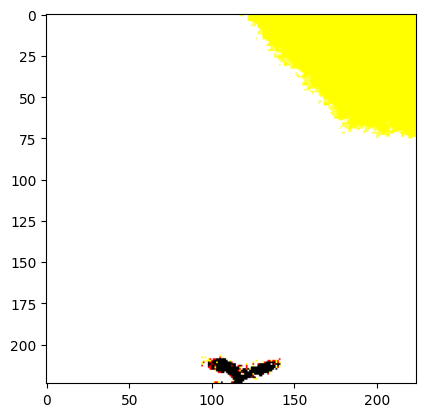

In [30]:
plt.imshow(x_origin_test[1])

In [31]:
# x_origin = []
# x_origin_temp = []
# y_temp = []
# y = []
del x_origin
del xs

In [32]:
y_test2 = y_test2.reset_index(drop=True)

In [33]:
pre_trained_model  = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
for layer in pre_trained_model.layers:
    layer.trainable = False
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [34]:
x1 = Flatten()(pre_trained_model.output)
fc1 = Dense(512, activation = 'relu')(x1)
fc2 = Dense(512, activation = 'relu')(fc1)
x = Dense(1, activation='linear')(fc2)
model = Model(pre_trained_model.input, x)

opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [35]:
weight_path="{}_aqi.best.h5".format('vgg16')

In [36]:
callback = [
    EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto'),
    ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                    save_best_only=True, mode='min', save_weights_only = True)]
history = model.fit(x=x_origin_train, y=y_train2, validation_data=(x_origin_valid, y_valid2), batch_size=16, epochs=150, callbacks=callback)

Epoch 1/150
250/250 [==============================] - ETA: 0s - loss: 4298.0527
Epoch 1: val_loss improved from inf to 2482.30249, saving model to vgg16_aqi.best.h5
250/250 [==============================] - 35s 90ms/step - loss: 4298.0527 - val_loss: 2482.3025
Epoch 2/150
250/250 [==============================] - ETA: 0s - loss: 1598.6376
Epoch 2: val_loss improved from 2482.30249 to 1820.91248, saving model to vgg16_aqi.best.h5
250/250 [==============================] - 25s 99ms/step - loss: 1598.6376 - val_loss: 1820.9125
Epoch 3/150
250/250 [==============================] - ETA: 0s - loss: 864.1477
Epoch 3: val_loss improved from 1820.91248 to 1773.98828, saving model to vgg16_aqi.best.h5
250/250 [==============================] - 21s 83ms/step - loss: 864.1477 - val_loss: 1773.9883
Epoch 4/150
250/250 [==============================] - ETA: 0s - loss: 514.2164
Epoch 4: val_loss improved from 1773.98828 to 1416.41797, saving model to vgg16_aqi.best.h5
250/250 [==================

In [37]:
model.load_weights(weight_path)

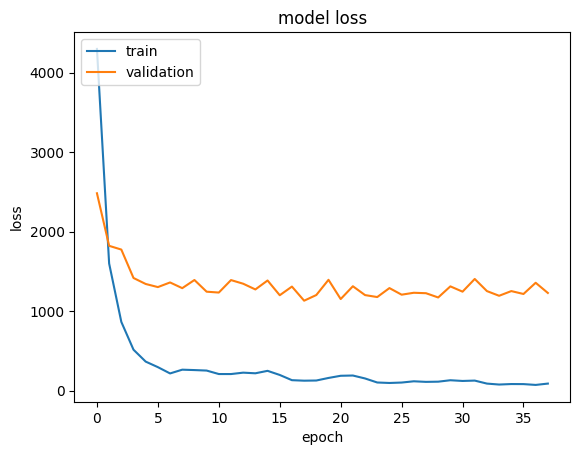

In [38]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

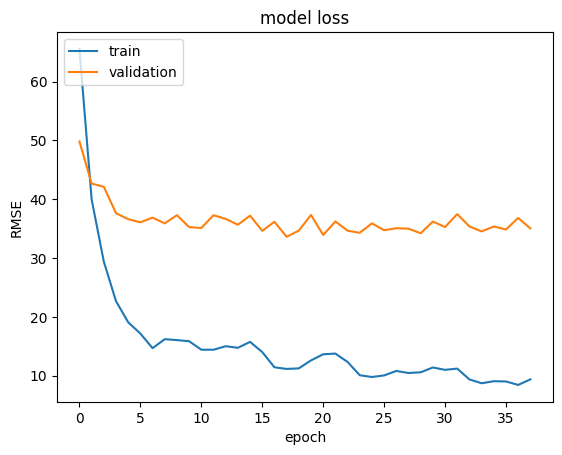

In [85]:
# summarize history for loss
plt.plot(list(map(lambda x:pow(x,0.5),history.history['loss'])))
plt.plot(list(map(lambda x:pow(x,0.5),history.history['val_loss'])))
plt.title('model loss')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [83]:
history.history['loss']**0.5

TypeError: ignored

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
model.save('/content/gdrive/MyDrive/VGG16-1.h5')

In [41]:
y_test2

0       39.00
1      329.00
2       32.00
3       18.00
4      185.00
        ...  
538    185.00
539    193.00
540     63.33
541     18.00
542      4.00
Name: PM2.5, Length: 543, dtype: float64

In [42]:
loss = model.evaluate(x=x_origin_test, y=y_test2, batch_size=16)
print('RMSE is :', loss ** 0.5)

34/34 [==============================] - 5s 146ms/step - loss: 984.9697
RMSE is : 31.384227353282093


Text(0, 0.5, 'Frequency')

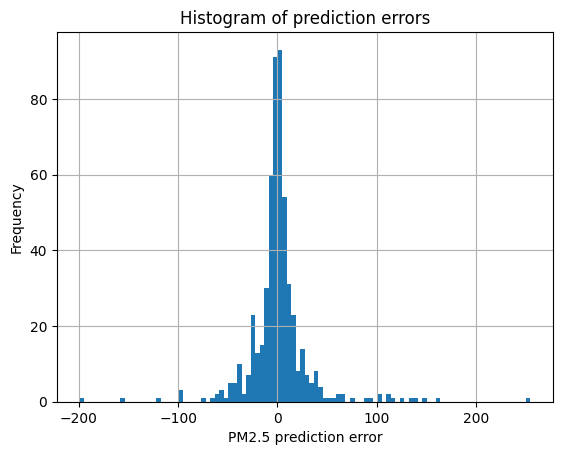

In [81]:
diff = y_test2 - y_pred
diff.hist(bins = 100)
plt.title('Histogram of prediction errors')
plt.xlabel('PM2.5 prediction error')
plt.ylabel('Frequency')

In [73]:
y_test2.shape

(543,)

In [75]:
y_pred = y_predict.reshape(-1,)

In [77]:
y_pred.shape

(543,)

In [72]:
y_predict.shape

(543, 1)

In [43]:
y_predict = model.predict(x_origin_test)

17/17 [==============================] - 12s 439ms/step


In [44]:
from sklearn.metrics import r2_score

r2_score(y_test2, y_predict)

0.9277140795254452

In [88]:
y_predict_pm25 = np.zeros(len(y_predict))

for i in range(len(y_predict)):
    if y_predict[i] <= 12.0:
        y_predict_pm25[i] = 0
    elif y_predict[i] <= 35.4:
        y_predict_pm25[i] = 1
    elif y_predict[i] <= 55.4:
        y_predict_pm25[i] = 2
    elif y_predict[i] <= 150.4:
        y_predict_pm25[i] = 3
    elif y_predict[i] <= 250.4:
        y_predict_pm25[i] = 4
    elif y_predict[i] > 250.4 :
        y_predict_pm25[i] = 5
    else:
        print('Exception Occured!')

y_predict_pm25 = y_predict_pm25.astype(int)


y_predict_pm25

array([2, 5, 1, 1, 4, 3, 3, 2, 5, 3, 4, 3, 0, 4, 1, 2, 5, 3, 5, 4, 1, 3,
       2, 1, 5, 4, 3, 3, 4, 1, 4, 2, 2, 1, 3, 4, 3, 4, 4, 4, 2, 2, 1, 4,
       2, 5, 1, 4, 2, 2, 3, 4, 4, 2, 1, 4, 3, 5, 3, 4, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 5, 3, 1, 4, 2, 3, 5, 4, 1, 1, 3, 4, 3, 4, 3, 2, 4, 3,
       4, 3, 2, 3, 2, 5, 3, 2, 3, 5, 3, 5, 4, 5, 1, 1, 1, 3, 3, 1, 5, 1,
       3, 2, 4, 3, 4, 3, 2, 2, 5, 4, 1, 4, 5, 2, 5, 2, 1, 2, 2, 2, 4, 1,
       2, 4, 4, 1, 5, 2, 2, 3, 3, 3, 4, 5, 3, 3, 2, 3, 5, 1, 3, 5, 1, 5,
       2, 1, 3, 2, 1, 1, 5, 1, 1, 5, 3, 3, 2, 4, 3, 4, 2, 1, 1, 2, 3, 3,
       1, 2, 3, 4, 4, 1, 4, 3, 2, 5, 2, 5, 5, 1, 2, 1, 1, 4, 2, 2, 4, 3,
       2, 4, 2, 4, 5, 2, 2, 3, 2, 3, 4, 3, 1, 3, 4, 4, 2, 4, 2, 5, 2, 5,
       4, 3, 5, 1, 4, 1, 1, 4, 5, 2, 4, 4, 2, 4, 3, 5, 3, 5, 2, 1, 1, 4,
       1, 2, 1, 4, 1, 1, 4, 3, 5, 4, 5, 4, 4, 2, 1, 2, 4, 3, 1, 1, 5, 4,
       2, 2, 1, 3, 1, 1, 3, 2, 2, 1, 2, 4, 4, 4, 3, 1, 4, 2, 5, 3, 2, 1,
       4, 3, 3, 1, 5, 1, 3, 1, 3, 2, 5, 4, 3, 3, 3,

In [87]:
#Classify the Ground Truth PM25 concentration to the air quality levels

y_test_pm25 = np.zeros(len(y_test2))

for i in range(len(y_test2)):
    if int(y_test2[i])  <= 12.0:
        y_test_pm25[i] = 0
    elif int(y_test2[i]) <= 35.4:
        y_test_pm25[i] = 1
    elif int(y_test2[i]) <= 55.4:
        y_test_pm25[i] = 2
    elif int(y_test2[i]) <= 150.4:
        y_test_pm25[i] = 3
    elif int(y_test2[i]) <= 250.4:
        y_test_pm25[i] = 4
    elif int(y_test2[i]) > 250.5:
        y_test_pm25[i] = 5
    else:
        print('Exception Occured!')

y_test_pm25 = y_test_pm25.astype(int)


y_test_pm25

array([2, 5, 1, 1, 4, 3, 3, 2, 5, 3, 4, 2, 1, 4, 1, 2, 5, 2, 5, 5, 1, 1,
       2, 1, 5, 3, 2, 2, 4, 1, 4, 2, 2, 1, 3, 5, 3, 4, 4, 4, 0, 1, 2, 4,
       2, 5, 1, 3, 3, 2, 3, 4, 4, 2, 1, 4, 3, 5, 2, 5, 2, 1, 3, 0, 1, 3,
       3, 1, 1, 3, 5, 3, 0, 4, 2, 3, 5, 4, 2, 1, 3, 4, 3, 4, 3, 3, 4, 3,
       4, 3, 2, 3, 3, 5, 3, 2, 3, 5, 3, 5, 4, 5, 0, 0, 1, 3, 3, 1, 5, 0,
       3, 2, 4, 3, 3, 3, 2, 2, 5, 4, 0, 5, 5, 0, 5, 0, 1, 0, 2, 2, 4, 1,
       0, 4, 4, 1, 5, 2, 2, 3, 2, 3, 4, 5, 3, 3, 2, 3, 5, 1, 3, 5, 1, 5,
       1, 1, 4, 2, 1, 0, 5, 0, 0, 5, 3, 3, 2, 4, 5, 4, 1, 2, 2, 2, 2, 3,
       1, 1, 3, 4, 1, 1, 4, 3, 2, 5, 2, 5, 5, 1, 2, 1, 1, 4, 2, 1, 5, 3,
       2, 5, 2, 4, 5, 1, 2, 3, 2, 2, 5, 3, 1, 3, 4, 4, 1, 4, 2, 4, 2, 5,
       4, 0, 5, 2, 4, 1, 0, 4, 5, 2, 4, 4, 2, 4, 3, 5, 3, 5, 1, 1, 1, 4,
       1, 2, 0, 4, 0, 1, 5, 2, 5, 4, 5, 4, 5, 0, 1, 3, 5, 3, 1, 0, 5, 4,
       2, 0, 2, 3, 1, 2, 3, 2, 3, 1, 2, 4, 4, 4, 1, 1, 4, 2, 5, 3, 1, 1,
       4, 1, 3, 1, 5, 2, 3, 1, 3, 2, 5, 4, 3, 3, 3,

In [46]:
# y_test = y_test.to_numpy().tolist()
y_test2.shape

(543,)

In [47]:
y_test2[0]

39.0

In [58]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test2, y_predict)

ValueError: ignored

In [63]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test_pm25, y_predict_pm25)

0.8246416944400139

In [64]:
from sklearn.metrics import f1_score

f1_score(y_test_pm25, y_predict_pm25, average='macro')

0.8190463339258576

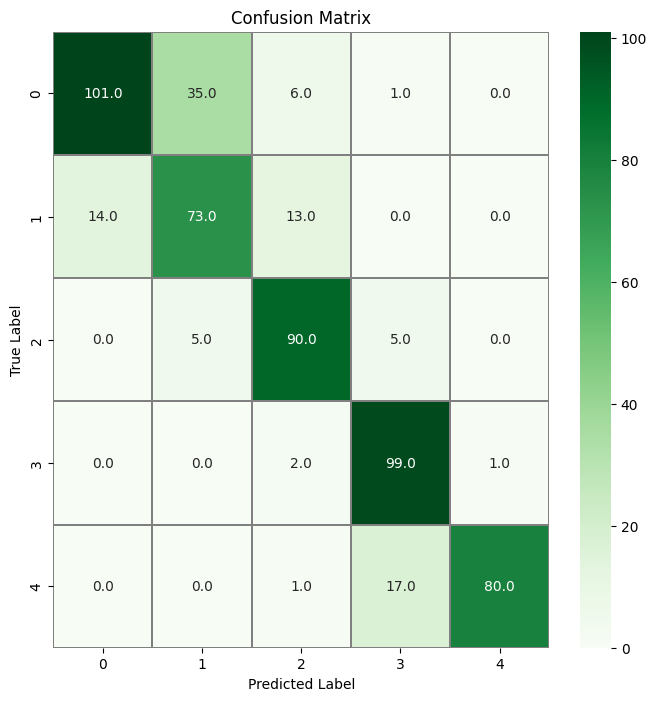

In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
Y_pred_classes = y_predict_pm25
Y_true = y_test_pm25
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

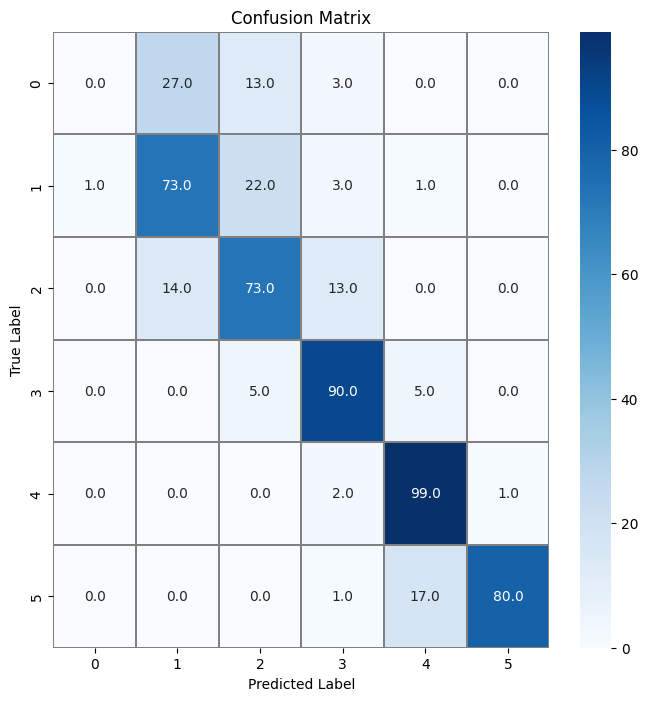

In [91]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
Y_pred_classes = y_predict_pm25
Y_true = y_test_pm25
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

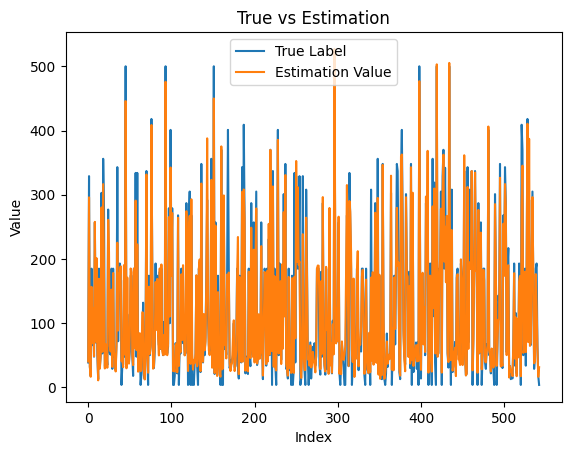

In [57]:
plt.plot(y_test2, label='True Label')
plt.plot(y_predict, label='Estimation Value')

# set the x-axis label
plt.xlabel('Index')

# set the y-axis label
plt.ylabel('Value')

# set the plot title
plt.title('True vs Estimation')

# Adding a legend
plt.legend()

# display the plot
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/gdrive/MyDrive/VGG16.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflmodel = converter.convert()
file = open( 'VGG16.tflite' , 'wb' )
file.write( tflmodel )

111303248

In [ ]:
!cp /content/VGG16.tflite /content/gdrive/MyDrive/

In [ ]:
! pip install tflite-support

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
interpreter = tf.lite.Interpreter(model_path = '/content/VGG16.tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape: ", input_details[0]['shape'])
print("Input Type: ", input_details[0]['dtype'])
print("Output Shape: ", output_details[0]['shape'])
print("Output Type: ", output_details[0]['dtype'])


Input Shape:  [  1 224 224   3]
Input Type:  <class 'numpy.float32'>
Output Shape:  [1 1]
Output Type:  <class 'numpy.float32'>


In [ ]:
# Copyright 2020 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Writes metadata and label file to the image classifier models."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

from absl import app
from absl import flags
import flatbuffers
import tensorflow as tf

# pylint: disable=g-direct-tensorflow-import
from tflite_support import metadata_schema_py_generated as _metadata_fb
from tflite_support import metadata as _metadata
# pylint: enable=g-direct-tensorflow-import

FLAGS = flags.FLAGS


def define_flags():
  flags.DEFINE_string("model_file", None,
                      "Path and file name to the TFLite model file.")
  flags.DEFINE_string("label_file", None, "Path to the label file.")
  flags.DEFINE_string("export_directory", None,
                      "Path to save the TFLite model files with metadata.")
  flags.mark_flag_as_required("model_file")
  flags.mark_flag_as_required("label_file")
  flags.mark_flag_as_required("export_directory")


class ModelSpecificInfo(object):
  """Holds information that is specificly tied to an image classifier."""

  def __init__(self, name, version, image_width, image_height, image_min,
               image_max, mean, std, num_classes, author):
    self.name = name
    self.version = version
    self.image_width = image_width
    self.image_height = image_height
    self.image_min = image_min
    self.image_max = image_max
    self.mean = mean
    self.std = std
    self.num_classes = num_classes
    self.author = author


_MODEL_INFO = {
    "VGG16.tflite":
        ModelSpecificInfo(
            name="VGG16",
            version="v1",
            image_width=224,
            image_height=224,
            image_min=0,
            image_max=255,
            mean=[127.5],
            std=[127.5],
            num_classes=6,
            author="TensorFlow")
}


class MetadataPopulatorForImageClassifier(object):
  """Populates the metadata for an image classifier."""

  def __init__(self, model_file, model_info, label_file_path):
    self.model_file = model_file
    self.model_info = model_info
    self.label_file_path = label_file_path
    self.metadata_buf = None

  def populate(self):
    """Creates metadata and then populates it for an image classifier."""
    self._create_metadata()
    self._populate_metadata()

  def _create_metadata(self):
    """Creates the metadata for an image classifier."""

    # Creates model info.
    model_meta = _metadata_fb.ModelMetadataT()
    model_meta.name = self.model_info.name
    model_meta.description = ("Identify the most prominent object in the "
                              "image from a set of %d categories." %
                              self.model_info.num_classes)
    model_meta.version = self.model_info.version
    model_meta.author = self.model_info.author
    model_meta.license = ("Apache License. Version 2.0 "
                          "http://www.apache.org/licenses/LICENSE-2.0.")

    # Creates input info.
    input_meta = _metadata_fb.TensorMetadataT()
    input_meta.name = "image"
    input_meta.description = (
        "Input image to be classified. The expected image is {0} x {1}, with "
        "three channels (red, blue, and green) per pixel. Each value in the "
        "tensor is a single byte between {2} and {3}.".format(
            self.model_info.image_width, self.model_info.image_height,
            self.model_info.image_min, self.model_info.image_max))
    input_meta.content = _metadata_fb.ContentT()
    input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
    input_meta.content.contentProperties.colorSpace = (
        _metadata_fb.ColorSpaceType.RGB)
    input_meta.content.contentPropertiesType = (
        _metadata_fb.ContentProperties.ImageProperties)
    input_normalization = _metadata_fb.ProcessUnitT()
    input_normalization.optionsType = (
        _metadata_fb.ProcessUnitOptions.NormalizationOptions)
    input_normalization.options = _metadata_fb.NormalizationOptionsT()
    input_normalization.options.mean = self.model_info.mean
    input_normalization.options.std = self.model_info.std
    input_meta.processUnits = [input_normalization]
    input_stats = _metadata_fb.StatsT()
    input_stats.max = [self.model_info.image_max]
    input_stats.min = [self.model_info.image_min]
    input_meta.stats = input_stats

    # Creates output info.
    output_meta = _metadata_fb.TensorMetadataT()
    output_meta.name = "probability"
    output_meta.description = "Probabilities of the %d labels respectively." % self.model_info.num_classes
    output_meta.content = _metadata_fb.ContentT()
    output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
    output_meta.content.contentPropertiesType = (
        _metadata_fb.ContentProperties.FeatureProperties)
    output_stats = _metadata_fb.StatsT()
    output_stats.max = [1.0]
    output_stats.min = [0.0]
    output_meta.stats = output_stats
    label_file = _metadata_fb.AssociatedFileT()
    label_file.name = os.path.basename(self.label_file_path)
    label_file.description = "Labels for objects that the model can recognize."
    label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
    output_meta.associatedFiles = [label_file]

    # Creates subgraph info.
    subgraph = _metadata_fb.SubGraphMetadataT()
    subgraph.inputTensorMetadata = [input_meta]
    subgraph.outputTensorMetadata = [output_meta]
    model_meta.subgraphMetadata = [subgraph]

    b = flatbuffers.Builder(0)
    b.Finish(
        model_meta.Pack(b),
        _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
    self.metadata_buf = b.Output()

  def _populate_metadata(self):
    """Populates metadata and label file to the model file."""
    populator = _metadata.MetadataPopulator.with_model_file(self.model_file)
    populator.load_metadata_buffer(self.metadata_buf)
    populator.load_associated_files([self.label_file_path])
    populator.populate()


def main(_):
  model_file = FLAGS.model_file
  model_basename = os.path.basename(model_file)
  if model_basename not in _MODEL_INFO:
    raise ValueError(
        "The model info for, {0}, is not defined yet.".format(model_basename))

  export_model_path = os.path.join(FLAGS.export_directory, model_basename)

  # Copies model_file to export_path.
  tf.io.gfile.copy(model_file, export_model_path, overwrite=False)

  # Generate the metadata objects and put them in the model file
  populator = MetadataPopulatorForImageClassifier(
      export_model_path, _MODEL_INFO.get(model_basename), FLAGS.label_file)
  populator.populate()

  # Validate the output model file by reading the metadata and produce
  # a json file with the metadata under the export path
  displayer = _metadata.MetadataDisplayer.with_model_file(export_model_path)
  export_json_file = os.path.join(FLAGS.export_directory,
                                  os.path.splitext(model_basename)[0] + ".json")
  json_file = displayer.get_metadata_json()
  with open(export_json_file, "w") as f:
    f.write(json_file)

  print("Finished populating metadata and associated file to the model:")
  print(model_file)
  print("The metadata json file has been saved to:")
  print(export_json_file)
  print("The associated file that has been been packed to the model is:")
  print(displayer.get_packed_associated_file_list())


if __name__ == "__main__":
  define_flags()
  app.run(main)

In [ ]:
!python /content/autututu.py \
    --model_file=/content/gdrive/MyDrive/VGG16.tflite \
    --label_file=/content/gdrive/MyDrive/labels.txt \
    --export_directory=/content/gdrive/MyDrive/A

2023-06-09 06:01:23.170494: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Finished populating metadata and associated file to the model:
/content/gdrive/MyDrive/VGG16.tflite
The metadata json file has been saved to:
/content/gdrive/MyDrive/A/VGG16.json
The associated file that has been been packed to the model is:
['labels.txt']


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install tflite-support-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tflite-support-nightly (from versions: none)
ERROR: No matching distribution found for tflite-support-nightly


In [ ]:
df3 = pd.read_csv('/content/frag5000_0.csv')

In [ ]:
df3

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class,new_AQI,new_AQI_Class
0,"Knowledge park, Greater Noida",UP_UN_2023-03-01-08.30-1-441.jpg,2023,3,1,8:30,99,35.00,345.00,2.00,42.00,22.00,25.00,d_Unhealthy,99,b_Moderate
1,Tamil Nadu,TN_Good_2023-02-22-09.30-1-256.jpg,2023,2,22,9:30,63,18.00,28.00,8.00,346.00,27.00,7.00,a_Good,63,b_Moderate
2,"Biratnagar, Nepal",BIR_UFSG_2023-02-14- 14.30-3-90.jpg,2023,2,14,14:30,95,33.18,48.66,68.31,0.25,3.25,0.67,c_Unhealthy_for_Sensitive_Groups,95,b_Moderate
3,Bengaluru,BENGR_Mod_2023-02-24-08.30-1-16.jpg,2023,2,24,8:30,93,32.00,61.00,26.00,228.00,5.00,21.00,b_Moderate,93,b_Moderate
4,"Knowledge park, Greater Noida",UP_UHFSG_2023-02-08-08.30-1-95.jpg,2023,2,8,8:30,97,34.00,199.00,2.00,28.00,16.00,47.00,c_Unhealthy_for_Sensitive_Groups,97,b_Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"Knowledge park, Greater Noida",UP_SEV_2023-02-18-14.30-1-36.jpg,2023,2,18,14:30,342,292.00,182.00,2.00,7.00,31.00,20.00,f_Severe,342,f_Severe
4996,"ITO, Delhi",DEL_VUnH_2023-02-16-14.30-1-233.jpg,2023,2,16,14:30,387,337.00,272.00,85.00,60.00,28.00,108.00,e_Very_Unhealthy,387,f_Severe
4997,Mumbai,MH_UnFSG_2023-02-15-10.30-1-13.jpg,2023,2,15,10:00,384,334.00,276.00,14.00,77.00,NaN,160.00,c_Unhealthy_for_Sensitive_Groups,384,f_Severe
4998,Mumbai,MH_UnFSG_2023-03-08-11.00-1-341.jpg,2023,3,8,11:00,337,287.00,177.00,NaN,NaN,NaN,85.00,c_Unhealthy_for_Sensitive_Groups,337,f_Severe


In [ ]:
PM25asLabel = df3['PM2.5']

In [ ]:
np.savetxt(r'/content/labels.txt', PM25asLabel, fmt='%d')

In [ ]:
!cp /content/labels.txt /content/gdrive/MyDrive

In [ ]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

ModuleNotFoundError: ignored

In [ ]:
!unzip /content/drive/MyDrive/A/VGG16.tflite

Archive:  /content/drive/MyDrive/A/VGG16.tflite
 extracting: labels.txt              
